**Random value imputation means we are gonna fill the missing values of a column with a random value from the same column**

*the random value picked to fill the missing value will usually be the one with the highest probability, let us say the values between 60-70 have the highest prob of 0.4, in a normally distributed data, then the chance that the random value picked will turn out to be some value between 60-70, higher chance!!**

# ON NUMERICAL DATA

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


**let us see which cols have missing values and their percentage**

In [127]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


*age has around 20% missing values*

In [128]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [129]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [130]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [131]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

/tmp/ipython-input-468893779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

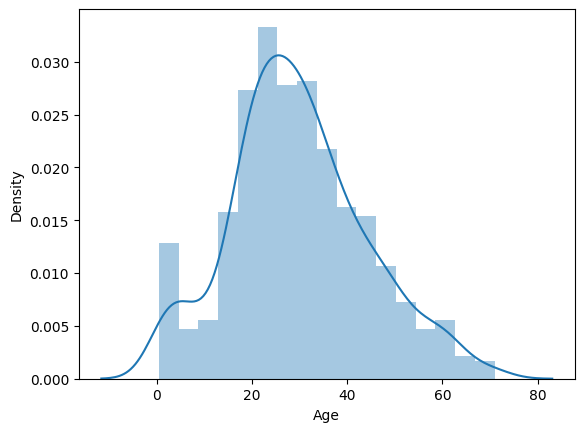

In [132]:
sns.distplot(X_train['Age'])

In [133]:
X_train['Age'].mean()

np.float64(29.78590425531915)

In [134]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [135]:
X_train['Age_imputed'].isnull().sum()

np.int64(148)

*there are 148 missing values in Age_imputed, so we need 148 values from Age to fill these missing values*

*before that we need to make sure we dont pick the NaN values, so drop it first*

In [136]:
len(X_train['Age'])

712

In [137]:
712-148

564

In [138]:
X_train['Age'].dropna().sample(5)

,Age
588,22.0
683,14.0
116,70.5
418,30.0
323,22.0


*we need 148 random values of age, but **in production**, for the same input we cant keep getting different output so we need to remember to avoid this, by setting the random state*

*for the same input "Fare", we get the same output "Age"*

In [139]:
X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'][30]))

,Age
399,28.0


In [140]:
X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'][873]))

,Age
58,5.0


In [141]:
val = X_train['Age'].isnull().sum()
val

np.int64(148)

In [142]:
X_train['Age'].dropna().sample(val)

,Age
758,34.0
421,21.0
842,30.0
599,49.0
403,28.0
...,...
247,24.0
750,4.0
754,48.0
722,34.0


*convert from series to array*

In [143]:
X_train['Age'].dropna().sample(val).values

array([50. , 39. , 18. , 34. , 45. ,  9. , 16. , 26. , 28. , 35. , 14. ,
        4. , 21. , 51. , 40. , 62. , 48. , 15. , 32. , 30. , 30. , 30. ,
       25. , 25. , 52. , 47. , 37. , 32. , 24. , 42. , 18. , 33. , 28. ,
       45. , 30. , 36. , 48. , 30. , 26. , 40.5, 46. , 23. , 45. , 22. ,
       27. , 24. ,  2. , 11. , 47. , 37. , 37. , 52. , 33. , 31. , 28. ,
       36. , 35. , 19. , 33. , 36. , 24. , 35. , 22. , 27. , 70. , 33. ,
       33. , 24. , 25. , 26. , 40. , 25. , 24. , 27. , 21. , 25. , 34. ,
       45. , 13. , 21. , 58. , 18. , 17. , 49. , 19. , 56. , 14. , 19. ,
       22. , 39. , 22. , 25. , 32.5, 66. ,  5. , 36. , 30. , 44. , 35. ,
       29. , 41. , 20. , 22. , 22. , 40. , 40. , 20. , 30. , 45.5,  8. ,
       35. , 53. ,  1. , 38. , 28. ,  2. ,  6. , 34. , 42. , 25. , 33. ,
       22. , 28. ,  9. , 38. , 30. , 19. , 32. , 25. , 62. , 24. , 18. ,
       47. , 31. , 60. , 31. , 22. , 27. , 29. , 42. , 19. , 29. , 17. ,
       31. , 38. , 26. , 36. , 19. ])

now use these 148 values to fill the NaN values in the Age_imputed col

In [144]:
X_train['Age_imputed'].isnull()

,Age_imputed
30,False
10,False
873,False
182,False
876,False
...,...
534,False
584,True
493,False
527,True


In [145]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

,Age_imputed
77,NaN
868,NaN
334,NaN
295,NaN
792,NaN
...,...
674,NaN
466,NaN
584,NaN
527,NaN


In [146]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(val).values

/tmp/ipython-input-4160278412.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(val).values


In [147]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,7.0
493,71.0,49.5042,71.0
527,NaN,221.7792,22.0


In [148]:
X_train['Age'].shape

(712,)

In [149]:
X_test['Age'].isnull().sum()

np.int64(29)

In [150]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipython-input-1890157598.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [151]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,27.0
870,26.0,7.8958,26.0


In [152]:
X_test['Age_imputed'].isnull().sum()

np.int64(0)

In [153]:
X_train['Age_imputed'].isnull().sum()

np.int64(0)

/tmp/ipython-input-2811307965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],
/tmp/ipython-input-2811307965.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],


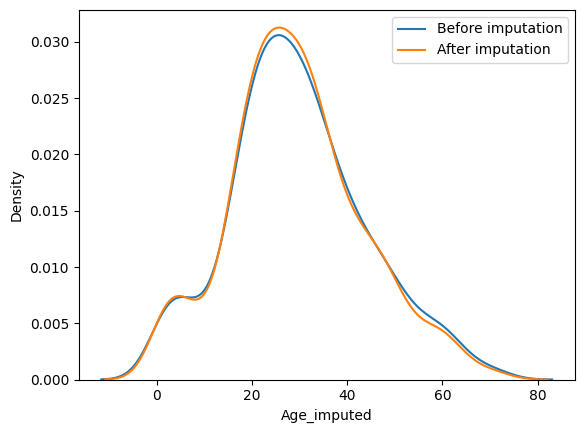

In [154]:
sns.distplot(X_train['Age'],
             label='Before imputation',
             hist = False)

sns.distplot(X_train['Age_imputed'],
             label = 'After imputation',
             hist = False)
plt.legend()
plt.show()

**distribution is not changed much which is an adv for linear models**

*not much deviation from mean because values around the mean are being picked when sampled!!!, that is why not much change in distribution and variance -> which inturn improves the accuracy of linear models*

In [155]:
print('Original variable variance',X_train['Age'].var())
print('Variance after random imputation',X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
Variance after random imputation 195.0357774838411


**the disadv is : the relationship with other columns have been disturbed due to this introduced randomness**

In [157]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,63.514910
Age,71.512440,204.349513,204.349513
Age_imputed,63.514910,204.349513,195.035777


**not much effect on outliers**

<Axes: >

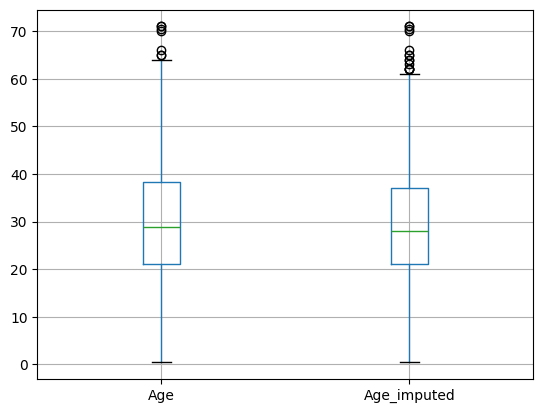

In [158]:
X_train[['Age','Age_imputed']].boxplot()

# ON CATEGORICAL DATA

In [160]:
df = pd.read_csv('house-train.csv',
                 usecols=['GarageQual','FireplaceQu','SalePrice'])


In [161]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [166]:
df.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [167]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [168]:
X = df
y = df['SalePrice']

In [169]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

**we can see that there are missing values in GarageQual, FireplaceQu columns**

In [170]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed']= X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [171]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1392,Po,TA,123000,TA,Po
1137,NaN,NaN,94000,NaN,NaN
733,TA,TA,131400,TA,TA
257,Gd,TA,220000,TA,Gd
599,TA,TA,151000,TA,TA


*now impute the NaN values of the columns with random values from the same column*

In [172]:
X_train['GarageQual'].isnull().sum()

np.int64(65)

*we need to fill these 65 values from the random values from the column GarageQual but before that , we need to drop the NaN values*

In [173]:
X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

array(['TA', 'Gd', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

*now let us fill these values in place of NaN values of GarageQual_imputed*

In [174]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]

,GarageQual_imputed
127,NaN
99,NaN
921,NaN
1179,NaN
1143,NaN
...,...
434,NaN
942,NaN
1326,NaN
1349,NaN


In [175]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

/tmp/ipython-input-2263490880.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp

In [190]:
X_train.sample(20)[['GarageQual','GarageQual_imputed']]

,GarageQual,GarageQual_imputed
1063,TA,TA
306,TA,TA
791,TA,TA
513,TA,TA
654,TA,TA
19,TA,TA
277,TA,TA
1165,TA,TA
178,TA,TA
869,TA,TA


similarly

In [191]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-4179475245.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values


In [193]:
X_train[['FireplaceQu','FireplaceQu_imputed']]

,FireplaceQu,FireplaceQu_imputed
455,TA,TA
863,NaN,Gd
504,Fa,Fa
1413,Gd,Gd
1389,Gd,Gd
...,...,...
466,Po,Po
299,Gd,Gd
493,Fa,Fa
527,Gd,Gd


**for test data**

In [196]:
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-1134338623.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
/tmp

In [197]:
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

/tmp/ipython-input-1140532451.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
/tmp/ipy

In [198]:
X_test

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
503,TA,TA,289000,TA,TA
101,TA,TA,178000,TA,TA
608,Gd,TA,359100,TA,Gd
1089,Gd,TA,197000,TA,Gd
819,Gd,TA,224000,TA,Gd
...,...,...,...,...,...
816,Gd,TA,137000,TA,Gd
1273,Gd,TA,177000,TA,Gd
285,NaN,TA,164700,TA,Po
194,NaN,TA,127000,TA,Gd


**now we need to make sure the ratio of categories before and after imputation, shd be same**

In [207]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],axis=1
)
temp.columns = ['original','imputed']

In [208]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [205]:
len(X_train['GarageQual'].dropna())

1103

In [203]:
X_train['GarageQual'].value_counts()

,count
GarageQual,
TA,1049
Fa,41
Gd,11
Po,1
Ex,1


In [206]:
1049/1103

0.9510426110607434

In [209]:
temp1 = pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
], axis = 1)

temp1.columns = ['original', 'imputed']

In [210]:
temp1

,original,imputed
Gd,0.494272,0.495719
TA,0.412439,0.411815
Fa,0.040917,0.040240
Po,0.027823,0.026541
Ex,0.024550,0.025685


In [213]:
X_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

we are plotting a pdf for SalePrice for all those rows where GarageQual value is TA, Gd, etc....

*Before imputation*

/tmp/ipython-input-1290955043.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],
/tmp/ipython-input-1290955043.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],
/t

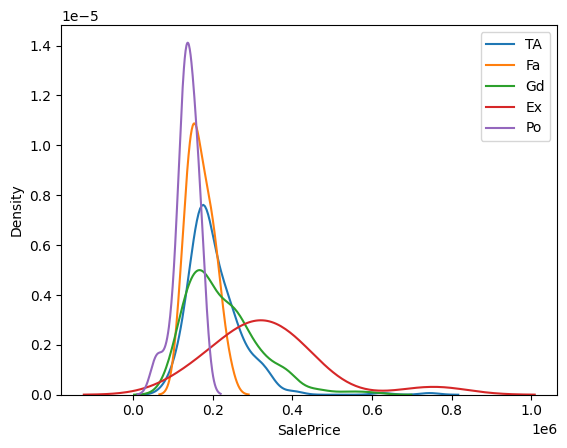

In [228]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],
               hist=False,label=category)
plt.legend()
plt.show()


In [223]:
X_train[X_train['FireplaceQu']=='TA']

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
573,TA,TA,170000,TA,TA
127,TA,NaN,87000,TA,TA
1427,TA,TA,140000,TA,TA
169,TA,TA,228000,TA,TA
...,...,...,...,...,...
404,TA,TA,168000,TA,TA
730,TA,TA,236500,TA,TA
433,TA,TA,181000,TA,TA
360,TA,TA,156000,TA,TA


In [226]:
X_train[X_train['FireplaceQu']=='TA']['SalePrice']

,SalePrice
455,175500
573,170000
127,87000
1427,140000
169,228000
...,...
404,168000
730,236500
433,181000
360,156000


*After imputation*

/tmp/ipython-input-1225705460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],
/tmp/ipython-input-1225705460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category][

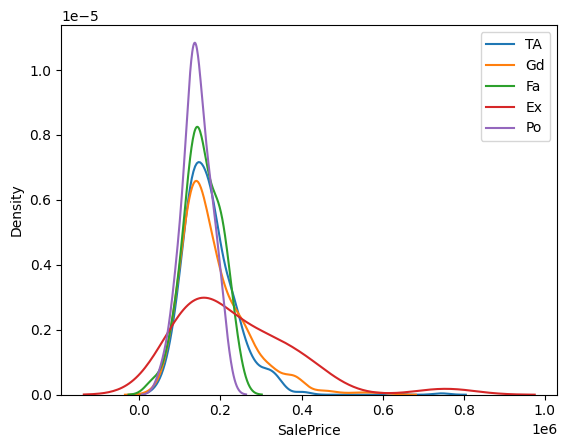

In [229]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],
               hist=False, label=category)

plt.legend()
plt.show()